In [8]:
import pandas as pd
import geopandas as gpd

neigh_gdf = gpd.read_file("../data/raw/neighbourhood-boundaries.geojson")
stats_df = pd.read_csv("../data/processed/neighbourhood_stats/ndvi_lst_neighbourhood_stats_2024.csv")

neigh_stats = neigh_gdf.merge(stats_df, left_on="AREA_NAME", right_on="neighborhood")

elderly_gdf = gpd.read_file("../data/processed/elderly_data.geojson")
elderly_gdf = elderly_gdf.to_crs(neigh_stats.crs)

elderly_gdf["elderly_pct"] = (
    elderly_gdf["Elderly Distribution"]
    .astype(str)
    .str.replace("%","", regex=False)
    .str.strip()
    .astype(float)
)

merged = neigh_stats.merge(
    elderly_gdf[["Neighbourhood", "elderly_pct"]].rename(columns={"Neighbourhood": "AREA_NAME"}),
    on="AREA_NAME",
    how="left"
)


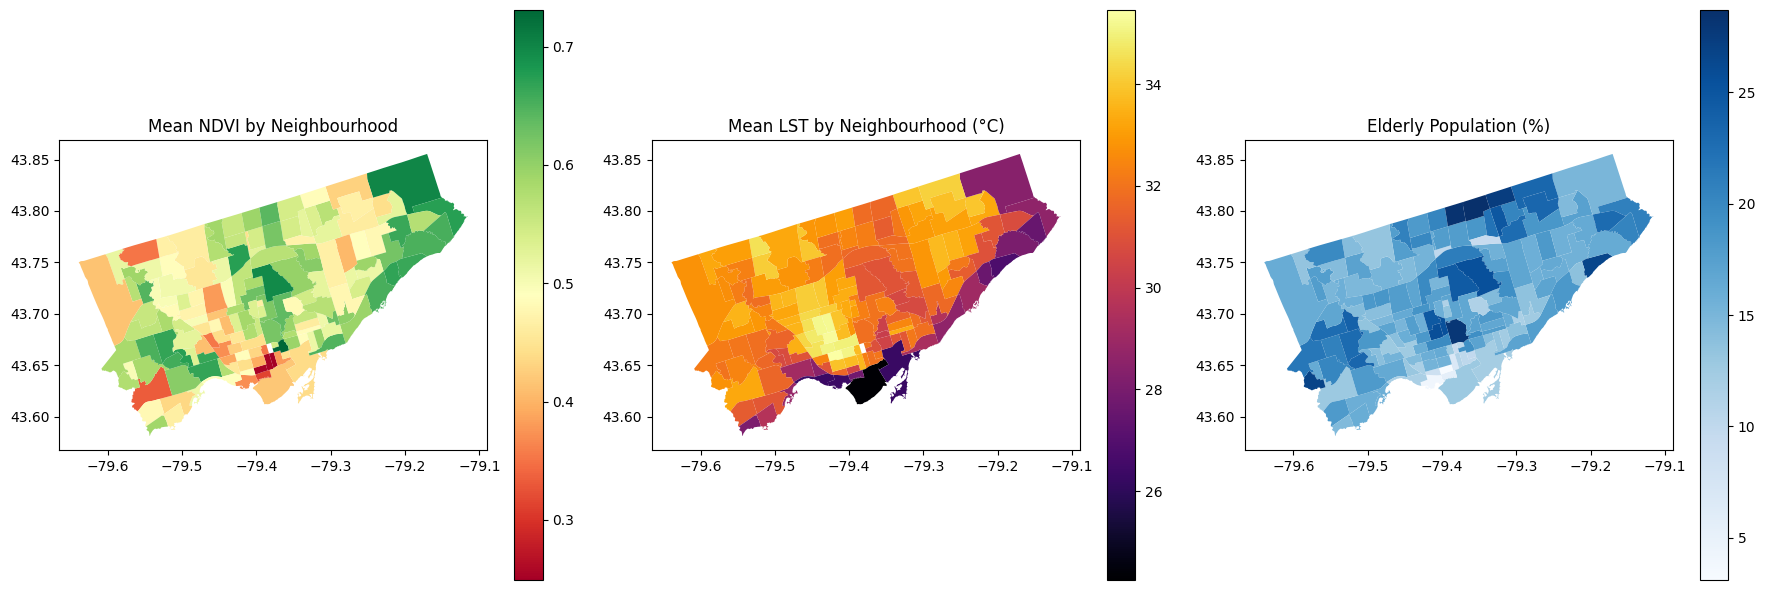

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
merged.plot(column="ndvi_mean_1km", cmap="RdYlGn", ax=axes[0], legend=True)
axes[0].set_title("Mean NDVI by Neighbourhood")
merged.plot(column="lst_mean_c", cmap="inferno", ax=axes[1], legend=True)
axes[1].set_title("Mean LST by Neighbourhood (°C)")
merged.plot(column="elderly_pct", cmap="Blues", ax=axes[2], legend=True)
axes[2].set_title("Elderly Population (%)")
plt.tight_layout()
plt.show()
